In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [5]:
energy = pd.read_excel("/content/drive/MyDrive/Cases/Energy Efficiency/ENB2012_data.xlsx")
energy.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [6]:
X = energy.drop(['Y1', 'Y2'], axis=1)
y = energy[['Y1','Y2']]
print(X.shape)
print(y.shape)

(768, 8)
(768, 2)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    random_state=2022)

### Scaling

In [8]:
mm_x = MinMaxScaler()
X_trn_scl = mm_x.fit_transform(X_train)
X_tst_scl = mm_x.transform(X_test)

In [10]:
mm_y = MinMaxScaler()
y_trn_scl = mm_y.fit_transform(y_train)
y_tst_scl = mm_y.transform(y_test)

#### Model Definition

In [12]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu',input_shape=(8,)),
    tf.keras.layers.Dense(5, activation='relu'), 
    tf.keras.layers.Dense(3, activation='relu'), 
    tf.keras.layers.Dense(2, activation='relu')
])
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping( monitor='val_loss',min_delta=0.0001, patience=15,verbose=3,restore_best_weights=True)
history = model.fit(X_trn_scl, y_trn_scl, validation_data=(X_tst_scl, y_tst_scl), epochs=1000,
                    callbacks=[early])

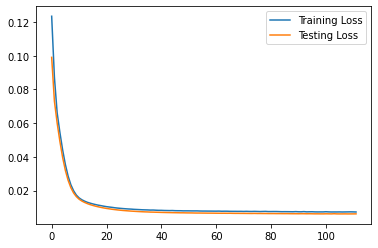

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='best')
plt.show()

In [16]:
y_pred = model.predict(X_tst_scl)
y_pred[:10]

8/8 [==============================] - 0s 2ms/step


array([[0.1172972 , 0.06976046],
       [0.2151794 , 0.16034082],
       [0.6708264 , 0.58199733],
       [0.12400946, 0.07597199],
       [0.8833407 , 0.7786585 ],
       [0.6305374 , 0.54471385],
       [0.16783866, 0.11653162],
       [0.32936984, 0.26601288],
       [0.29320607, 0.23254684],
       [0.64056945, 0.5539976 ]], dtype=float32)

#### Inverse Scaling

In [18]:
y_pred = model.predict(X_tst_scl)
y_pred = mm_y.inverse_transform(y_pred)
y_pred[:10]

8/8 [==============================] - 0s 4ms/step


array([[10.344131, 13.490205],
       [13.960879, 16.853455],
       [30.797035, 32.50956 ],
       [10.592149, 13.72084 ],
       [38.64944 , 39.81159 ],
       [29.308357, 31.125225],
       [12.211638, 15.226819],
       [18.180216, 20.777058],
       [16.843964, 19.534464],
       [29.679043, 31.469929]], dtype=float32)

#### Y1 R2

In [19]:
from sklearn.metrics import r2_score 
print(r2_score(y_test[:,0], y_pred[:,0]))

0.9245004156432111


### Y2 R2

In [20]:
print(r2_score(y_test[:,1], y_pred[:,1]))

0.8950575045371726
